# M-H 알고리즘
메트로폴리스-헤이스팅스(Metropolis-Hastings) 알고리즘은 마르코프 체인 몬테카를로(MCMC) 샘플링 방법 중 하나로, 목표로 하는 확률 분포로부터 표본을 추출하는 데 사용됩니다. 주로 계산이 어려운 확률 분포에서 샘플링할 때 유용하게 쓰입니다. 주로 베이지안 통계학에서 확률 모형의 모수를 추정하는 데 활용됩니다.

## 에제 6.2.1 : Gumbel 분포를 제안분포로, 정규분포를 목표분포로 한 M-H 알고리즘 구현.

목표 분포 :  $p(x) =  1 / \sqrt{2  \pi}  \exp{-x^2 / 2}$

제안 분포: $ q(x \mid x^*) $ 를 정의합니다. 
- Gumbel 분포는 극한값 분포 중 하나로, 확률 변수 $ X $의 CDF가 $ \exp(-\exp(-(x - x^*) / s))$ 인 분포

수용 비율 : $ \alpha(x, x^*) $은 목표 분포 $ p(x) $와 제안 분포 $ q(x \mid x^*) $의 비율을 나타내며, 이 비율이 1보다 작거나 같아야 합니다.

In [72]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
def p(x) : 
    return 1 / np.sqrt(1/2*np.pi) * np.exp(-x**2 / 2)

In [74]:
def q(x, x_star, s = 0.5) :
    return 1/s * np.exp( -(x-x_star) / s) * np.exp( -np.exp( -(x-x_star)/s))

In [83]:
def alpha(x, x_star) :
    return min(1, (p(x_star) * q(x, x_star)) / (p(x) * q(x_star, x)))

In [99]:
T = 100000
x = 5
x_list = [5]

In [100]:
for i in range(T):
    x_star = np.random.gumbel(x , 0.5) # q(x) 함수에서 뽑은거
    u = np.random.uniform(0,1)
    if u <= alpha(x, x_star) :
        x_list.append(x_star)
        x = x_star
    else :
        x_list.append(x)

In [101]:
x_list

[5,
 4.969463766488399,
 4.776254630229786,
 4.776254630229786,
 4.776254630229786,
 4.776254630229786,
 4.338406953608052,
 4.338406953608052,
 4.338406953608052,
 3.973223597733459,
 3.973223597733459,
 3.973223597733459,
 3.973223597733459,
 4.560143786433584,
 4.560143786433584,
 4.560143786433584,
 4.474087145515087,
 4.521875290575507,
 4.218334119700756,
 3.7285100118216152,
 3.7285100118216152,
 3.7285100118216152,
 3.5296358131615873,
 3.8333614328696224,
 3.7726944989281144,
 3.7265808149272934,
 3.514244402429129,
 3.514244402429129,
 3.514244402429129,
 3.652510036510253,
 3.372086100722883,
 3.0620824587549857,
 2.7582494768580257,
 2.784899755620955,
 2.621098547146715,
 2.621098547146715,
 2.621098547146715,
 2.23015860586312,
 2.23015860586312,
 2.23015860586312,
 2.23015860586312,
 2.1802462784342738,
 1.4337206986004345,
 1.4239137465427396,
 1.4239137465427396,
 1.4239137465427396,
 1.6664329351724791,
 1.8463317318312689,
 1.8463317318312689,
 1.8463317318312689,
 1

(array([2.000e+00, 0.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 1.400e+01,
        6.000e+00, 1.900e+01, 1.700e+01, 1.900e+01, 4.000e+01, 5.100e+01,
        5.800e+01, 8.700e+01, 1.220e+02, 1.410e+02, 1.920e+02, 2.140e+02,
        2.230e+02, 3.870e+02, 3.840e+02, 5.190e+02, 5.910e+02, 6.420e+02,
        7.810e+02, 8.840e+02, 1.080e+03, 1.165e+03, 1.438e+03, 1.555e+03,
        1.731e+03, 1.913e+03, 2.064e+03, 2.273e+03, 2.594e+03, 2.702e+03,
        2.927e+03, 3.110e+03, 3.077e+03, 3.289e+03, 3.502e+03, 3.588e+03,
        3.478e+03, 3.679e+03, 3.442e+03, 3.475e+03, 3.453e+03, 3.398e+03,
        3.493e+03, 3.212e+03, 2.927e+03, 2.886e+03, 2.680e+03, 2.288e+03,
        2.280e+03, 2.004e+03, 1.908e+03, 1.657e+03, 1.518e+03, 1.294e+03,
        1.188e+03, 9.940e+02, 8.830e+02, 7.160e+02, 6.510e+02, 5.890e+02,
        5.230e+02, 3.700e+02, 3.400e+02, 2.670e+02, 2.030e+02, 2.090e+02,
        1.300e+02, 1.480e+02, 5.700e+01, 6.100e+01, 4.200e+01, 3.300e+01,
        3.400e+01, 8.000e+00, 7.000e+0

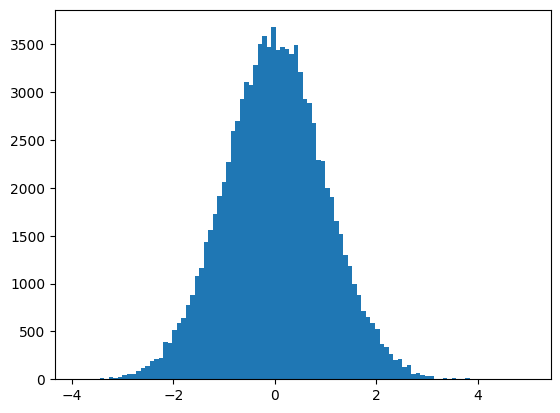

In [102]:
plt.hist(x_list, bins = 100)